In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# import required libraries
import pandas as pd


In [4]:
# Read data
file = 'drive/MyDrive/professional_training_beginner folder/module12/Transactions.csv'

df = pd.read_csv(file)

print(df.head(2).T)

                                        0                       1
Unnamed: 0.1                            0                       1
Unnamed: 0                              0                       1
TRANSACTION_ID                          0                       1
TX_DATETIME           2023-01-01 00:00:31     2023-01-01 00:02:10
CUSTOMER_ID                           596                    4961
TERMINAL_ID                          3156                    3412
TX_AMOUNT                          533.07                  808.56
TX_TIME_SECONDS                        31                     130
TX_TIME_DAYS                            0                       0
TX_FRAUD_SCENARIO  Legitimate Transaction  Legitimate Transaction


In [5]:
# Data exploration
print(df.shape)

(1754155, 10)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   Unnamed: 0         int64  
 2   TRANSACTION_ID     int64  
 3   TX_DATETIME        object 
 4   CUSTOMER_ID        int64  
 5   TERMINAL_ID        int64  
 6   TX_AMOUNT          float64
 7   TX_TIME_SECONDS    int64  
 8   TX_TIME_DAYS       int64  
 9   TX_FRAUD_SCENARIO  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 133.8+ MB


In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01
std,5.063811e+05,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00
25%,4.385385e+05,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01
50%,8.770770e+05,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01
75%,1.315616e+06,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02
max,1.754154e+06,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02


In [8]:
df['TX_FRAUD_SCENARIO'].value_counts('normalize')

TX_FRAUD_SCENARIO
Legitimate Transaction             0.865480
Fraudulent Transaction Internet    0.126705
Fraudulent Transaction DAB         0.005175
Fraudulent Transaction retailer    0.002640
Name: proportion, dtype: float64

In [9]:
df.groupby(['TX_FRAUD_SCENARIO']).agg({'CUSTOMER_ID':['nunique'], 'TRANSACTION_ID':['count']})

,CUSTOMER_ID,TRANSACTION_ID
,nunique,count
TX_FRAUD_SCENARIO,,
Fraudulent Transaction DAB,3212,9077
Fraudulent Transaction Internet,2871,222261
Fraudulent Transaction retailer,487,4631
Legitimate Transaction,4987,1518186


In [10]:
# Create single varible to classify
df['TX_FRAUD_']=(df['TX_FRAUD_SCENARIO']!='Legitimate Transaction').astype(int)
df['TX_FRAUD_'].value_counts('normalize')


TX_FRAUD_
0    0.86548
1    0.13452
Name: proportion, dtype: float64

In [11]:
import plotly.express as px

def plot_fraud_scenario_counts(data_frame):
    """
    Plots the counts of transactions for different fraud scenarios using a bar chart,
    with bars ordered alphabetically by the fraud scenario name.

    :param data_frame: The DataFrame containing the data.
    """
    # Calculate the counts of each fraud scenario and sort by scenario name
    counts = data_frame['TX_FRAUD_SCENARIO'].value_counts().reset_index()
    counts.columns = ['TX_FRAUD_SCENARIO', 'Number of Transactions']
    counts.sort_values(by='TX_FRAUD_SCENARIO', inplace=True)

    # Create the bar chart
    fig = px.bar(counts, x='TX_FRAUD_SCENARIO', y='Number of Transactions',
                 title="Number of Transactions by Fraud Scenario",
                 labels={'TX_FRAUD_SCENARIO': 'Fraud Scenario'},
                 color='TX_FRAUD_SCENARIO',  # This will color each bar differently
                 template='plotly_white')

    # Show the plot
    fig.show()

# To use this function, you would pass your DataFrame to it like so:
plot_fraud_scenario_counts(df)


In [12]:
import plotly.express as px

def plot_data_imbalance(data_frame, target_column):
    """
    Display a pie chart to illustrate class imbalance in the target column.
    Fraudulent transactions are grouped into one category.

    :param data_frame: The DataFrame containing the data.
    :param target_column: The name of the target column for which the imbalance should be illustrated.
    """
    # Create a new column to merge all fraud types into a single category
    data_frame['Merged Fraud'] = data_frame[target_column].apply(lambda x: 'Fraudulent Transaction' if 'Fraudulent' in x else 'Legitimate Transaction')

    # Calculate the counts of each category
    counts = data_frame['Merged Fraud'].value_counts().reset_index()
    counts.columns = ['Category', 'Count']

    # Create the pie chart
    fig = px.pie(counts, values='Count', names='Category', title='Class Imbalance in Transactions',
                 color='Category',  # Colors will be assigned automatically
                 color_discrete_map={'Fraudulent Transaction': 'orange', 'Legitimate Transaction': 'blue'})  # Customize colors if desired

    # Set the figure size
    fig.update_layout(width=800, height=500)

    # Show the plot
    fig.show()

# To use this function, you would pass your DataFrame to it like so:
plot_data_imbalance(df, 'TX_FRAUD_SCENARIO')


In [13]:
df.head()

,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO,TX_FRAUD_,Merged Fraud
0,0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,Legitimate Transaction,0,Legitimate Transaction
1,1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,Legitimate Transaction,0,Legitimate Transaction
2,2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,Fraudulent Transaction Internet,1,Fraudulent Transaction
3,3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,Legitimate Transaction,0,Legitimate Transaction
4,4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,Legitimate Transaction,0,Legitimate Transaction


In [14]:
# Create a column Month
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['Month'] = df['TX_DATETIME'].dt.month
df_group = df.groupby(['Month', 'TX_FRAUD_']).agg({'TRANSACTION_ID': ['count']}).reset_index()
df_group = df_group.droplevel(level=1, axis=1)
df_group


,Month,TX_FRAUD_,TRANSACTION_ID
0,1,0,258376
1,1,1,39264
2,2,0,232475
3,2,1,36195
4,3,0,256532
5,3,1,40164
6,4,0,248685
7,4,1,38679
8,5,0,256655
9,5,1,40218


In [15]:
# Create a Monthly a graph by trasaction type

import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming df_group is already defined and contains the necessary data
df_ = df_group

# Pivot the DataFrame to have transaction_type as columns for easier plotting with plotly
pivot_df = df_.pivot(index='Month', columns='TX_FRAUD_', values='TRANSACTION_ID').fillna(0)

# Create traces for non-fraud and fraud transactions with the color scale
traces = []
for transaction_type in pivot_df.columns:
    color = 'blue' if transaction_type == 0 else 'yellow'
    traces.append(go.Bar(
        x=pivot_df.index,
        y=pivot_df[transaction_type],
        name='Transaction',
        marker_color=color
    ))

# Create the figure with the traces
fig = go.Figure(data=traces)

# Update the layout for a stacked bar chart
fig.update_layout(
    title='Monthly Distribution of Transactions and Fraud Scenario',
    xaxis_title='Month',
    yaxis_title='Number of Transactions',
    barmode='stack'
)

# Update legend
fig.update_layout(showlegend=False)

# Add label for transaction type
fig.add_annotation(
    x=0.5,
    y=-0.15,
    xref="paper",
    yref="paper",
    text="Transaction type",
    showarrow=False,
    font=dict(
        size=14,
        color="black"
    )
)


colorscale = [(0, 'blue'), (1, 'yellow')]

# Add a dummy trace for generating the color bar
dummy_trace = go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(
        size=1,
        color=[0, 1],  # Color points on the color scale
        colorscale=colorscale,
        showscale=True  # This shows the color scale
    ),
    hoverinfo='none'
)

fig.add_trace(dummy_trace)

# Configure the layout to add the color bar
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Transaction Type',
        tickvals=[0, 1],
        ticktext=['Non-Fraud', 'Fraud'],
        thicknessmode='pixels',
        thickness=30,
        lenmode='pixels',
        len=200,
        xanchor='left',
        x=1.02
    )
)

# Adjust the margin to accommodate the color bar
fig.update_layout(margin=dict(l=50, r=200, t=50, b=50))

# Show the figure
fig.show()


In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO,TX_FRAUD_,Merged Fraud,Month
0,0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,Legitimate Transaction,0,Legitimate Transaction,1
1,1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,Legitimate Transaction,0,Legitimate Transaction,1
2,2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,Fraudulent Transaction Internet,1,Fraudulent Transaction,1
3,3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,Legitimate Transaction,0,Legitimate Transaction,1
4,4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,Legitimate Transaction,0,Legitimate Transaction,1


In [17]:
df.TX_FRAUD_SCENARIO.value_counts('normalize')

TX_FRAUD_SCENARIO
Legitimate Transaction             0.865480
Fraudulent Transaction Internet    0.126705
Fraudulent Transaction DAB         0.005175
Fraudulent Transaction retailer    0.002640
Name: proportion, dtype: float64

In [18]:
# Function to balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
def balance_data_with_smote(df, target_column):
    X = df.drop([target_column] + [col for col in df.columns if 'Unnamed' in col], axis=1)
    y = df[target_column]
    smote = SMOTE(random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X.select_dtypes(include=[int, float]), y)
    balanced_df = pd.DataFrame(X_resampled, columns=X.select_dtypes(include=[int, float]).columns)
    balanced_df[target_column] = y_resampled
    return balanced_df

# Balance the dataset
balanced_df = balance_data_with_smote(df, 'TX_FRAUD_')

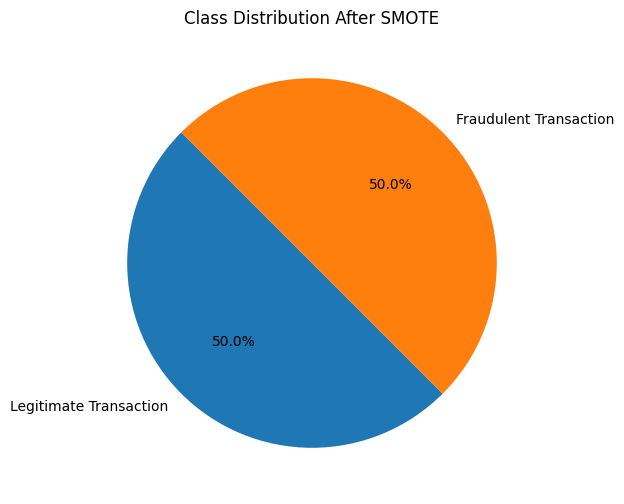

In [19]:
import matplotlib.pyplot as plt

# Function to plot data imbalance with legend
def plot_data_imbalance(data_frame, target_column):
    labels = ['Legitimate Transaction', 'Fraudulent Transaction']
    sizes = data_frame[target_column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=135)
    plt.title('Class Distribution After SMOTE')
    plt.ylabel('')
    plt.show()

# Assuming 'balanced_df' is your DataFrame and 'TX_FRAUD_' is the column with fraud indicators
plot_data_imbalance(balanced_df, 'TX_FRAUD_')


### Test removing variables

In [22]:
# Separate variables
df_ = df[['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS','TX_TIME_DAYS', 'TX_FRAUD_']]

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
# Prepare data for model training
X = df_.drop('TX_FRAUD_', axis=1)
y = df_['TX_FRAUD_']

# Encode labels
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)


In [23]:
df_.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_
0,596,3156,533.07,31,0,0
1,4961,3412,808.56,130,0,0
2,2,1365,1442.94,476,0,1
3,4128,8737,620.65,569,0,0
4,927,9906,490.66,634,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

logistic_classifier = LogisticRegression(random_state=1)
logistic_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=5)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation scores:", logistic_scores)
print("Average cross-validation score:", logistic_scores.mean())
print("Test accuracy:", test_accuracy)


Cross-validation scores: [0.89329984 0.89232003 0.89261219 0.89321433 0.89239803]
Average cross-validation score: 0.8927688827591809
Test accuracy: 0.8939090331242108


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy = knn_scores.mean()

print('K-Nearest Neighbors Cross-Validation Scores:', knn_scores)
print('K-Nearest Neighbors Mean Cross-Validation Accuracy:', knn_accuracy)
print('K-Nearest Neighbors Test Accuracy:', test_accuracy)


K-Nearest Neighbors Cross-Validation Scores: [0.88309551 0.88274277 0.88289242 0.88324871 0.88274235]
K-Nearest Neighbors Mean Cross-Validation Accuracy: 0.8829443519800144
K-Nearest Neighbors Test Accuracy: 0.8860362966784577


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt_classifier = DecisionTreeClassifier(random_state=1)
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy = dt_scores.mean()

print('Decision Tree Cross-Validation Scores:', dt_scores)
print('Decision Tree Mean Cross-Validation Accuracy:', dt_accuracy)
print('Decision Tree Test Accuracy:', test_accuracy)


Decision Tree Cross-Validation Scores: [0.99862469 0.99830046 0.99836816 0.99836816 0.99831827]
Decision Tree Mean Cross-Validation Accuracy: 0.9983959512716396
Decision Tree Test Accuracy: 0.9988940544022621


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy = xgb_scores.mean()

print('XGBoost Cross-Validation Scores:', xgb_scores)
print('XGBoost Mean Cross-Validation Accuracy:', xgb_accuracy)
print('XGBoost Test Accuracy:', test_accuracy)


XGBoost Cross-Validation Scores: [0.99475888 0.99443108 0.99469474 0.99443821 0.99433843]
XGBoost Mean Cross-Validation Accuracy: 0.9945322675349088
XGBoost Test Accuracy: 0.9945700351451269


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=1)
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy = rf_scores.mean()

print('Random Forest Cross-Validation Scores:', rf_scores)
print('Random Forest Mean Cross-Validation Accuracy:', rf_accuracy)
print('Random Forest Test Accuracy:', test_accuracy)


Random Forest Cross-Validation Scores: [0.99546078 0.9953147  0.99533608 0.99522919 0.99515435]
Random Forest Mean Cross-Validation Accuracy: 0.9952990185127097
Random Forest Test Accuracy: 0.9954023447186822
